# Unit 5 - Financial Planning

In [ ]:
# Initial imports
import os
import requests
import pandas as pd
import json
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [ ]:
# Load .env enviroment variables
load_dotenv()

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [ ]:
# Set current amount of crypto assets
my_btc = 1.2
my_eth = 5.3


In [ ]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [ ]:
# Fetch current BTC price
# Retreiving data from URL using Get function and storing in response_data_btc variable
response_data_btc = requests.get(btc_url)
# Storing the data as a JSON in result_btc variable
result_btc = response_data_btc.json()
#Printing the JSON Data(Commented to save space)
#print(json.dumps(result_btc, indent=7))
# Selecting the BTC price in CAD from JSON
my_btc_value = result_btc['data']['1']['quotes']['CAD']['price']

# Fetch current ETH price
# Retreiving data from URL using Get function and storing in response_data_eth variable
response_data_eth = requests.get(eth_url)
# Storing the data as a JSON in result_eth variable
result_eth = response_data_eth.json()
#Printing the JSON Data(Commented to save space)
#print(json.dumps(result_eth, indent=7))
# Selecting the ETH price in CAD from JSON
my_eth_value = result_eth['data']['1027']['quotes']['CAD']['price']

# Compute current value of my crpto
#Calculating the total price of BTC and storing it in my_btc_value variable
my_btc_value = my_btc_value*my_btc
#Calculating the total price of ETH and storing it in my_eth_value variable
my_eth_value = my_eth_value*my_eth

# Print current crypto wallet balance
print(f"The current value of your {my_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {my_eth} ETH is ${my_eth_value:0.2f}")

### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [ ]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [ ]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object
alpaca = tradeapi.REST(alpaca_api_key,alpaca_secret_key,api_version="v2")

In [ ]:
# Format current date as ISO format
start_date = pd.Timestamp("2022-07-07", tz="America/New_York").isoformat()
end_date = pd.Timestamp("2022-07-07", tz="America/New_York").isoformat()

# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
ticker_data = alpaca.get_bars(
    tickers,
    timeframe,
    start=start_date,
    end=end_date
).df

# Reorganize the DataFrame
# Separate ticker data
ticker_data_spy = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
ticker_data_agg = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)


# Concatenate the ticker DataFrames
df_portfolio = pd.concat([ticker_data_agg, ticker_data_spy],axis=1, keys=['AGG','SPY'])

# Preview DataFrame
df_portfolio.head()



In [ ]:
# Pick AGG and SPY close prices
agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])
# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

In [ ]:
# Compute the current value of shares
my_spy_value = my_spy*spy_close_price
my_agg_value = my_agg*agg_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

### Savings Health Analysis

In [ ]:
# Set monthly household income
monthly_income = 12000


# Consolidate financial assets data
crypto = (my_btc_value+my_eth_value)
shares = (my_spy_value+my_agg_value)
value_data = {
    "Crypto": [crypto],
    "Shares": [shares]
}
# Create savings DataFrame
df_savings = pd.DataFrame(value_data)
df_savings = df_savings.transpose()
df_savings = df_savings.rename(columns={df_savings.columns[0]:'amount'})

# Display savings DataFrame
display(df_savings)

In [ ]:
# Plot savings pie chart
df_savings.plot.pie(y = 'amount',title="Portfolio Composition")

In [ ]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
total_savings = sum(df_savings['amount'])

# Validate saving health
if total_savings>emergency_fund:
    print("Congratulations. You have enough money for emergency funds")
elif total_savings == emergency_fund:
    print("Congratulations on reaching your financial goals")
else:
    print(f"You are just ${emergency_fund-total_savings} away from reaching your financial goal")

## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [ ]:
import time
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date_mc = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date_mc = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [ ]:
# Get 5 years' worth of historical data for SPY and AGG
# YOUR CODE HERE!
# Set the tickers
tickers_mc = ["AGG", "SPY"]

# Set timeframe to "1Day" for Alpaca API
timeframe_mc = "1Day"

# Get current closing prices for SPY and AGG
# Get 1 year's worth of historical data for AAPL
df_stock_data = alpaca.get_bars(
    tickers_mc,
    timeframe_mc,
    start=start_date_mc,
    end=end_date_mc
).df
# Reorganize the DataFrame
# Separate ticker data
df_stock_data_spy = ticker_data[ticker_data['symbol']=='SPY'].drop('symbol', axis=1)
df_stock_data_agg = ticker_data[ticker_data['symbol']=='AGG'].drop('symbol', axis=1)




# Concatenate the ticker DataFrames
df_stock_data = pd.concat([df_stock_data_agg, df_stock_data_spy],axis=1, keys=['AGG','SPY'])

# Display sample data
df_stock_data.head()


In [ ]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.60,0.40],
    num_simulation = 500,
    num_trading_days = 252*30
)


In [ ]:
# Printing the simulation input data
MC_even_dist.portfolio_data.head()

In [ ]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_even_dist.calc_cumulative_return()

In [ ]:
# Plot simulation outcomes
line_plot = MC_even_dist.plot_simulation()

In [ ]:
# Plot probability distribution and confidence intervals
dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [ ]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
even_tbl

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [ ]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
ci_lower = round(even_tbl[8]*20000*1.5,2)
ci_upper = round(even_tbl[9]*20000*1.5,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [116]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.60,0.40],
    num_simulation = 500,
    num_trading_days = 252*5
)
# Printing simulation input data
MC_even_dist_5_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [117]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_even_dist_5_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/akhilsai/Desktop/Fintech/Python IPYNB's/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.003464,0.999439,0.998510,0.994290,0.995265,0.999846,1.002484,1.001279,1.004200,0.998853,...,0.998814,1.005850,1.004041,1.001655,1.001854,0.992539,1.010039,1.002517,0.996914,0.995316
2,0.998614,0.994047,0.995812,0.988278,0.992775,1.003334,0.991042,0.994527,1.010652,1.000707,...,0.991868,1.006579,1.000262,0.997373,1.004885,0.996360,1.010577,1.002798,1.002666,0.986718
3,0.996353,1.003035,0.988710,0.990812,0.989865,1.007229,0.986757,0.997416,1.016858,1.005901,...,0.991662,1.003076,1.006378,1.000232,0.995114,0.999245,1.014208,1.001573,0.996022,0.987510
4,0.999444,1.004210,0.977413,0.990174,0.984986,1.003096,0.986793,0.987927,1.005011,1.007548,...,0.995143,1.004749,1.003288,0.999206,0.996785,1.006796,1.017138,1.010677,1.002172,0.993278
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,1.064671,1.407513,1.290138,1.212544,1.167874,1.201387,1.151852,1.390363,1.812093,1.344106,...,1.570728,1.302138,1.201775,1.452004,1.116228,1.542081,1.469346,1.291118,0.997338,1.298716
1257,1.075509,1.401956,1.284808,1.203620,1.164707,1.210314,1.153120,1.405020,1.814423,1.343690,...,1.559585,1.302111,1.201609,1.471387,1.122724,1.539891,1.472960,1.291421,0.997704,1.299804
1258,1.081258,1.404409,1.282282,1.201586,1.164866,1.201388,1.165039,1.412787,1.816694,1.343722,...,1.550770,1.309921,1.207646,1.478914,1.113257,1.533453,1.470099,1.298552,0.992309,1.305996
1259,1.081219,1.395471,1.285333,1.199224,1.169751,1.206632,1.168912,1.409575,1.837597,1.331521,...,1.558530,1.303813,1.216116,1.483934,1.108814,1.529166,1.469837,1.300810,0.995607,1.309991


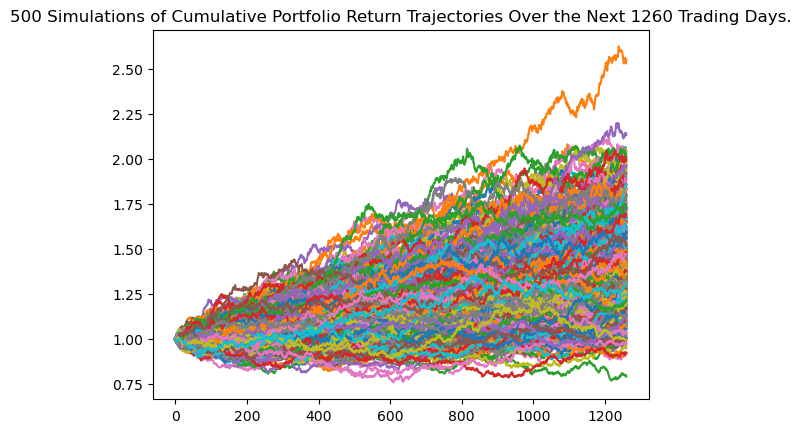

In [118]:
# Plot simulation outcomes
line_plot_5_year = MC_even_dist_5_year.plot_simulation()

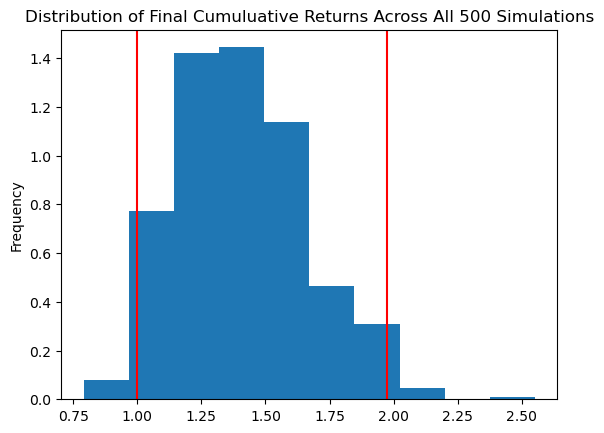

In [119]:
# Plot probability distribution and confidence intervals
dist_plot_5_year = MC_even_dist_5_year.plot_distribution()

In [120]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_5_year = MC_even_dist_5_year.summarize_cumulative_return()

# Print summary statistics
even_tbl_5_year

count           500.000000
mean              1.411572
std               0.254064
min               0.792015
25%               1.238846
50%               1.384394
75%               1.578112
max               2.550403
95% CI Lower      0.997365
95% CI Upper      1.973563
Name: 1260, dtype: float64

In [122]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
ci_lower_5_year = round(even_tbl_5_year[8]*20000,2)
ci_upper_5_year = round(even_tbl_5_year[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_5_year} and ${ci_upper_5_year}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 5 years will end within in the range of $19947.3 and $39471.26


### Ten Years Retirement Option

In [110]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10_year = MCSimulation(
    portfolio_data = df_stock_data,
    weights = [0.80,0.20],
    num_simulation = 500,
    num_trading_days = 252*10
)
# Printing simulation input data
MC_even_dist_10_year.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
timestamp                                                                
2016-05-02 04:00:00+00:00  110.74  110.7400  110.5200  110.61  3553939   
2016-05-03 04:00:00+00:00  110.89  110.9450  110.7500  110.81  3044940   
2016-05-04 04:00:00+00:00  110.91  110.9315  110.7595  110.86  2920608   
2016-05-05 04:00:00+00:00  110.92  111.1600  110.8010  111.14  3008142   
2016-05-06 04:00:00+00:00  111.12  111.1200  110.9700  110.97  2718710   

                                                                   SPY  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2016-05-02 04:00:00+00:00       15119  110.627199          NaN  206.90   
2016-05-03 04:00:00+00:00       15662  110.865995     0.001808  206.50   
2016-05-04 04:00:00+00:00       13982  110.879063     0.000451  205.00   
2016-05-05 04:00:00+00:00       15707  111.028363     0.002526  205.57   
2016-05-06 04:00:00+00:00       12697  111.031967    -0.001530  204.04   

                                                                          \
                             high     low   close     volume trade_count   
timestamp                                                                  
2016-05-02 04:00:00+00:00  208.18  206.41  208.03   61908515      263580   
2016-05-03 04:00:00+00:00  206.80  205.28  206.13  106422142      377518   
2016-05-04 04:00:00+00:00  205.85  204.42  204.96   92199810      345261   
2016-05-05 04:00:00+00:00  205.98  204.47  204.95   67597222      280622   
2016-05-06 04:00:00+00:00  205.77  203.88  205.70   89131004      340335   

                                                    
                                 vwap daily_return  
timestamp                                           
2016-05-02 04:00:00+00:00  207.294812          NaN  
2016-05-03 04:00:00+00:00  206.312060    -0.009133  
2016-05-04 04:00:00+00:00  205.090172    -0.005676  
2016-05-05 04:00:00+00:00  205.141555    -0.000049  
2016-05-06 04:00:00+00:00  204.937074     0.003659

In [111]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_even_dist_10_year.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


/Users/akhilsai/Desktop/Fintech/Python IPYNB's/MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.006703,0.998643,1.005111,0.999473,0.999926,0.998936,1.003954,1.001950,0.997637,1.003488,...,1.002898,1.000063,1.002475,1.004568,1.003938,1.001876,1.001482,0.993218,0.995735,1.000182
2,1.017022,1.005836,1.005127,0.997739,1.004499,0.996456,1.004983,1.000329,0.997769,1.010037,...,1.000388,0.999816,1.006354,1.009022,1.003090,1.000880,1.000570,0.992410,0.999749,0.997154
3,1.020081,1.003977,1.000385,0.996606,1.003837,1.003651,1.006145,1.000476,0.995295,1.014156,...,1.006148,0.996709,1.008222,1.004311,1.001430,1.000876,0.998390,0.993491,0.995075,0.997405
4,1.018255,1.003601,1.000358,0.997644,0.992721,1.002743,1.004047,0.998093,0.992014,1.021597,...,1.004416,0.992726,1.007844,1.004487,1.001813,1.002158,1.003786,0.997423,0.991755,0.997076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,0.955097,1.439144,2.297248,1.700907,0.957920,1.788268,1.446493,1.463004,1.278977,1.279446,...,1.409199,1.448074,1.101693,1.568606,1.770796,1.198041,1.321546,1.687043,1.206302,1.809560
2517,0.954000,1.441483,2.287850,1.701779,0.956213,1.779388,1.447754,1.466931,1.279700,1.275599,...,1.418180,1.451613,1.100532,1.565851,1.771362,1.198568,1.320133,1.682882,1.203623,1.820161
2518,0.958279,1.436028,2.272085,1.704989,0.958471,1.781927,1.442534,1.472695,1.283753,1.274400,...,1.415684,1.463786,1.100754,1.569357,1.763499,1.189873,1.326609,1.687829,1.207697,1.824339
2519,0.956401,1.436437,2.265800,1.700201,0.958831,1.782397,1.448066,1.480458,1.283172,1.281541,...,1.415654,1.459052,1.100535,1.568333,1.762666,1.200994,1.324558,1.696620,1.210725,1.820921


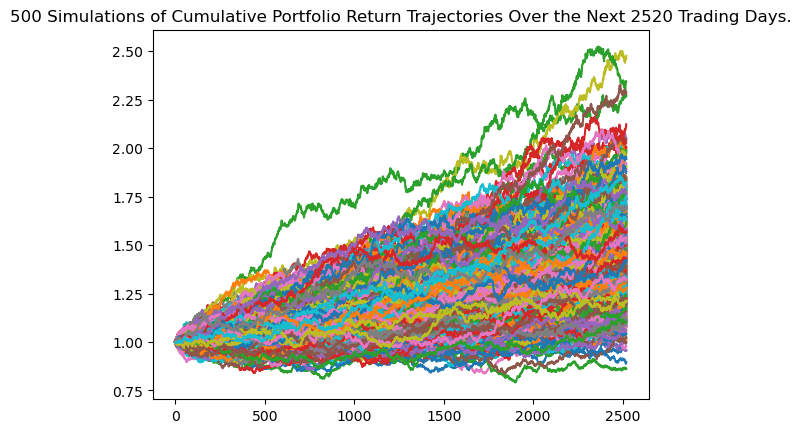

In [112]:
# Plot simulation outcomes
line_plot_10_year = MC_even_dist_10_year.plot_simulation()

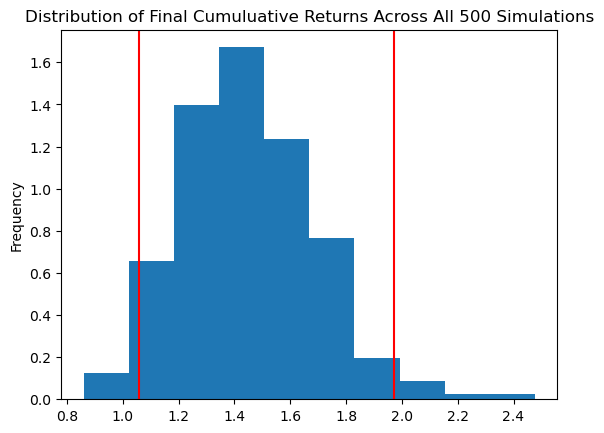

In [113]:
# Plot probability distribution and confidence intervals
dist_plot_10_year = MC_even_dist_10_year.plot_distribution()

In [114]:
# Fetch summary statistics from the Monte Carlo simulation results
even_tbl_10_year = MC_even_dist_10_year.summarize_cumulative_return()

# Print summary statistics
even_tbl_10_year

count           500.000000
mean              1.452403
std               0.241384
min               0.860751
25%               1.280696
50%               1.441384
75%               1.613106
max               2.476437
95% CI Lower      1.057142
95% CI Upper      1.971575
Name: 2520, dtype: float64

In [115]:
# Set initial investment
initial_investment = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
ci_lower_ten = round(even_tbl_10_year[8]*60000,2)
ci_upper_ten = round(even_tbl_10_year[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $63428.51 and $118294.52
